# Análisis de los resultados obtenidos

 Una vez obtenidos los resultados a todas las respuestas,procedemos a analizar y sacar conclusiones de los resultados obtenidos.
 Para ello, vamos a usar la libreria pandas de python que nos ayudará a manipular y analizar los datos


* ### Carga de los JSON en Dataframe

In [26]:
import json
import matplotlib.pyplot as plt
import pandas as pd

ruta_archivo_json_preguntas = './preguntas.json'
ruta_archivo_json_respuestas = './respuestas.json'
ruta_archivo_json_resultados = './resultados.json'

# Carga JSON preguntas

with open(ruta_archivo_json_preguntas) as archivo_json:
    datos_json = json.load(archivo_json)

preguntas = pd.DataFrame(datos_json)
preguntas = preguntas.drop(columns='id')
# Carga JSON respuestas

with open(ruta_archivo_json_respuestas) as archivo_json:
    datos_json = json.load(archivo_json)

respuestas = pd.DataFrame(datos_json)
respuestas = respuestas.drop(columns=['id_respuesta', 'id_pregunta'])
# Carga JSON resultados

with open(ruta_archivo_json_resultados) as archivo_json:
    datos_json = json.load(archivo_json)

valoracion = pd.DataFrame(datos_json)
valoracion = valoracion.drop(columns=['id_respuesta', 'id_pregunta'])

# Unir los tres DataFrames en uno solo
resultados = pd.concat([preguntas, respuestas, valoracion], axis=1)

## RESULTADOS GENERALES

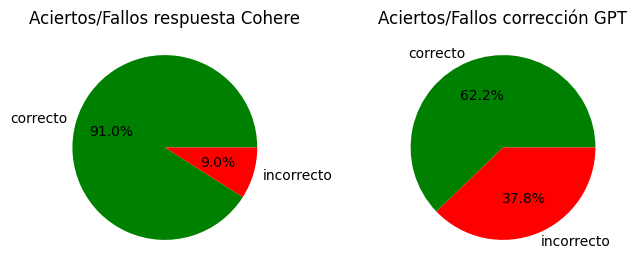

In [27]:
# Calcular la proporción de respuestas correctas e incorrectas
revisiones = resultados[resultados['revision'] != ""]
proporcionesCohere = resultados['resultado'].value_counts(normalize=True)
proporcionesGPT = revisiones['revision'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Crear el gráfico circular en el segundo subplot
axs[0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0].set_title('Aciertos/Fallos respuesta Cohere')

axs[1].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Aciertos/Fallos corrección GPT')

plt.show()

## RESULTADOS CULTURA GENERAL

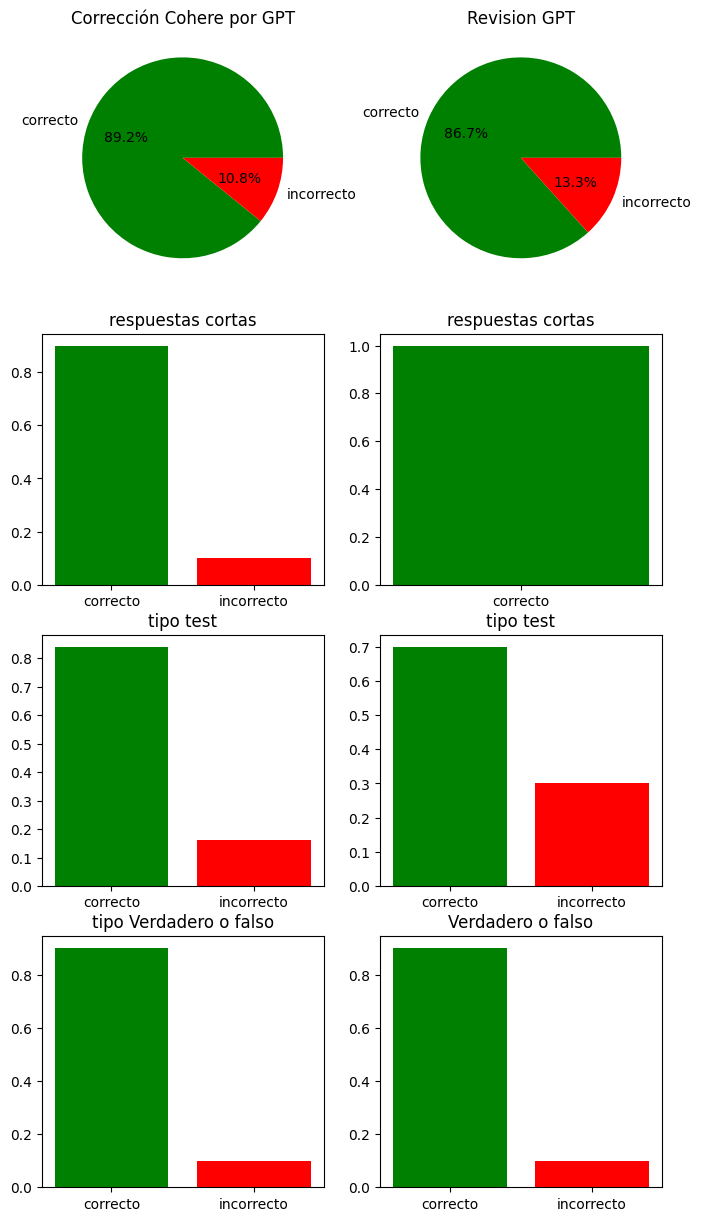

In [28]:
# Calcular la proporción de respuestas correctas e incorrectas

general = resultados.loc[(resultados['tema'] == 'cultura general')]
generalRevision = revisiones.loc[(revisiones['tema'] == 'cultura general')]
corta = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'respuesta corta')]
tets = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'test con 3 opciones')]
vof = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'verdadero o falso')]

cortaRevisiones = revisiones.loc[(revisiones['tema'] == 'cultura general') & (revisiones['tipo'] == 'respuesta corta')]
tetsRevisiones = revisiones.loc[(revisiones['tema'] == 'cultura general') & (revisiones['tipo'] == 'test con 3 opciones')]
vofRevisiones = revisiones.loc[(revisiones['tema'] == 'cultura general') & (revisiones['tipo'] == 'verdadero o falso')]

proporcionesCohere = general['resultado'].value_counts(normalize=True)
proporcionesGPT = generalRevision['revision'].value_counts(normalize=True)

proporcionesCohereCorta = corta['resultado'].value_counts(normalize=True)
proporcionesCohereTest = tets['resultado'].value_counts(normalize=True)
proporcionesCohereVof = vof['resultado'].value_counts(normalize=True)

proporcionesGPTCorta = cortaRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTTest = tetsRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTVof = vofRevisiones['revision'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(4, 2, figsize=(8, 15))

# Crear el gráfico circular en el segundo subplot
axs[0][0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][0].set_title('Corrección Cohere por GPT')

axs[0][1].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][1].set_title('Revision GPT')

axs[1][0].bar(proporcionesCohereCorta.index, proporcionesCohereCorta.values, color=['green', 'red'])
axs[1][0].set_title('respuestas cortas')

axs[1][1].bar(proporcionesGPTCorta.index, proporcionesGPTCorta.values, color=['green', 'red'])
axs[1][1].set_title('respuestas cortas')

axs[2][0].bar(proporcionesCohereTest.index, proporcionesCohereTest.values, color=['green', 'red'])
axs[2][0].set_title('tipo test')

axs[2][1].bar(proporcionesGPTTest.index, proporcionesGPTTest.values, color=['green', 'red'])
axs[2][1].set_title('tipo test')

axs[3][0].bar(proporcionesCohereVof.index, proporcionesCohereVof.values, color=['green', 'red'])
axs[3][0].set_title('tipo Verdadero o falso')

axs[3][1].bar(proporcionesGPTVof.index, proporcionesGPTVof.values, color=['green', 'red'])
axs[3][1].set_title('Verdadero o falso')

plt.show()

## RESULTADOS TRADUCCIONES

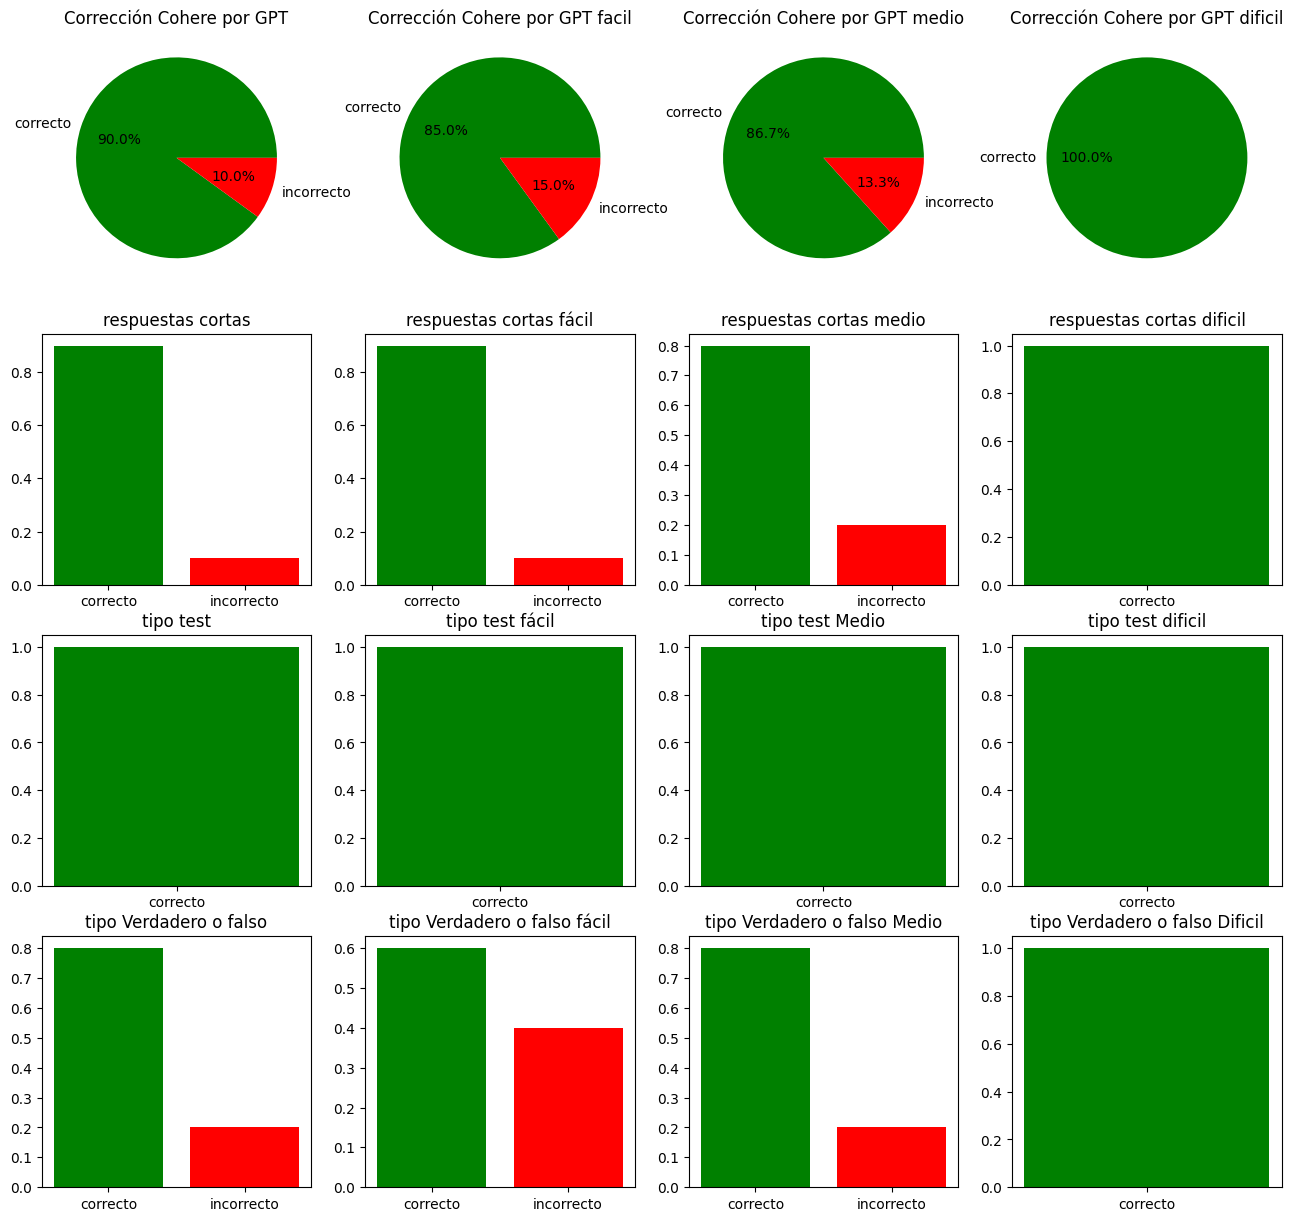

In [29]:
# Calcular la proporción de respuestas correctas e incorrectas
general = resultados.loc[(resultados['tema'] == 'traducción linguistica')]
generalFacil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['dificultad'] == 'fácil')]
generalMedia = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['dificultad'] == 'media')]
generalDificil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['dificultad'] == 'difícil')]

corta = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'respuesta corta')]
cortaFacil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'respuesta corta') & (resultados['dificultad'] == 'fácil')]
cortaMedia = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'respuesta corta')& (resultados['dificultad'] == 'media')]
cortaDificil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'respuesta corta')& (resultados['dificultad'] == 'difícil')]

tets = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'test con 3 opciones')]
tetsFacil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'fácil')]
tetsMedia = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'media')]
tetsDificil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'difícil')]

vof = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'verdadero o falso')]
vofFacil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'fácil')]
vofMedia = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'media')]
vofDificil = resultados.loc[(resultados['tema'] == 'traducción linguistica') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'difícil')]

proporcionesCohere = general['resultado'].value_counts(normalize=True)
proporcionesCohereFacil = generalFacil['resultado'].value_counts(normalize=True)
proporcionesCohereMedia = generalMedia['resultado'].value_counts(normalize=True)
proporcionesCohereDificil = generalDificil['resultado'].value_counts(normalize=True)

proporcionesCohereCorta = corta['resultado'].value_counts(normalize=True)
proporcionesCohereTest = tets['resultado'].value_counts(normalize=True)
proporcionesCohereVof = vof['resultado'].value_counts(normalize=True)

proporcionesCohereCortaFacil = cortaFacil['resultado'].value_counts(normalize=True)
proporcionesCohereTestFacil = tetsFacil['resultado'].value_counts(normalize=True)
proporcionesCohereVofFacil = vofFacil['resultado'].value_counts(normalize=True)

proporcionesCohereCortaMedia = cortaMedia['resultado'].value_counts(normalize=True)
proporcionesCohereTestMedia = tetsMedia['resultado'].value_counts(normalize=True)
proporcionesCohereVofMedia = vofMedia['resultado'].value_counts(normalize=True)

proporcionesCohereCortaDificil = cortaDificil['resultado'].value_counts(normalize=True)
proporcionesCohereTestDificil = tetsDificil['resultado'].value_counts(normalize=True)
proporcionesCohereVofDificil = vofDificil['resultado'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(4, 4, figsize=(16, 15))

# Crear el gráfico circular en el segundo subplot
axs[0][0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][0].set_title('Corrección Cohere por GPT')

axs[0][1].pie(proporcionesCohereFacil.values, labels=proporcionesCohereFacil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][1].set_title('Corrección Cohere por GPT facil')

axs[0][2].pie(proporcionesCohereMedia.values, labels=proporcionesCohereMedia.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][2].set_title('Corrección Cohere por GPT medio')

axs[0][3].pie(proporcionesCohereDificil.values, labels=proporcionesCohereDificil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][3].set_title('Corrección Cohere por GPT dificil')

axs[1][0].bar(proporcionesCohereCorta.index, proporcionesCohereCorta.values, color=['green', 'red'])
axs[1][0].set_title('respuestas cortas')

axs[1][1].bar(proporcionesCohereCortaFacil.index, proporcionesCohereCortaFacil.values, color=['green', 'red'])
axs[1][1].set_title('respuestas cortas fácil')

axs[1][2].bar(proporcionesCohereCortaMedia.index, proporcionesCohereCortaMedia.values, color=['green', 'red'])
axs[1][2].set_title('respuestas cortas medio')

axs[1][3].bar(proporcionesCohereCortaDificil.index, proporcionesCohereCortaDificil.values, color=['green', 'red'])
axs[1][3].set_title('respuestas cortas dificil')

axs[2][0].bar(proporcionesCohereTest.index, proporcionesCohereTest.values, color=['green', 'red'])
axs[2][0].set_title('tipo test')

axs[2][1].bar(proporcionesCohereTestFacil.index, proporcionesCohereTestFacil.values, color=['green', 'red'])
axs[2][1].set_title('tipo test fácil')

axs[2][2].bar(proporcionesCohereTestMedia.index, proporcionesCohereTestMedia.values, color=['green', 'red'])
axs[2][2].set_title('tipo test Medio')

axs[2][3].bar(proporcionesCohereTestDificil.index, proporcionesCohereTestDificil.values, color=['green', 'red'])
axs[2][3].set_title('tipo test dificil')

axs[3][0].bar(proporcionesCohereVof.index, proporcionesCohereVof.values, color=['green', 'red'])
axs[3][0].set_title('tipo Verdadero o falso')

axs[3][1].bar(proporcionesCohereVofFacil.index, proporcionesCohereVofFacil.values, color=['green', 'red'])
axs[3][1].set_title('tipo Verdadero o falso fácil')

axs[3][2].bar(proporcionesCohereVofMedia.index, proporcionesCohereVofMedia.values, color=['green', 'red'])
axs[3][2].set_title('tipo Verdadero o falso Medio')

axs[3][3].bar(proporcionesCohereVofDificil.index, proporcionesCohereVofDificil.values, color=['green', 'red'])
axs[3][3].set_title('tipo Verdadero o falso Dificil')

plt.show()

## RESULTADOS CÓDIGO

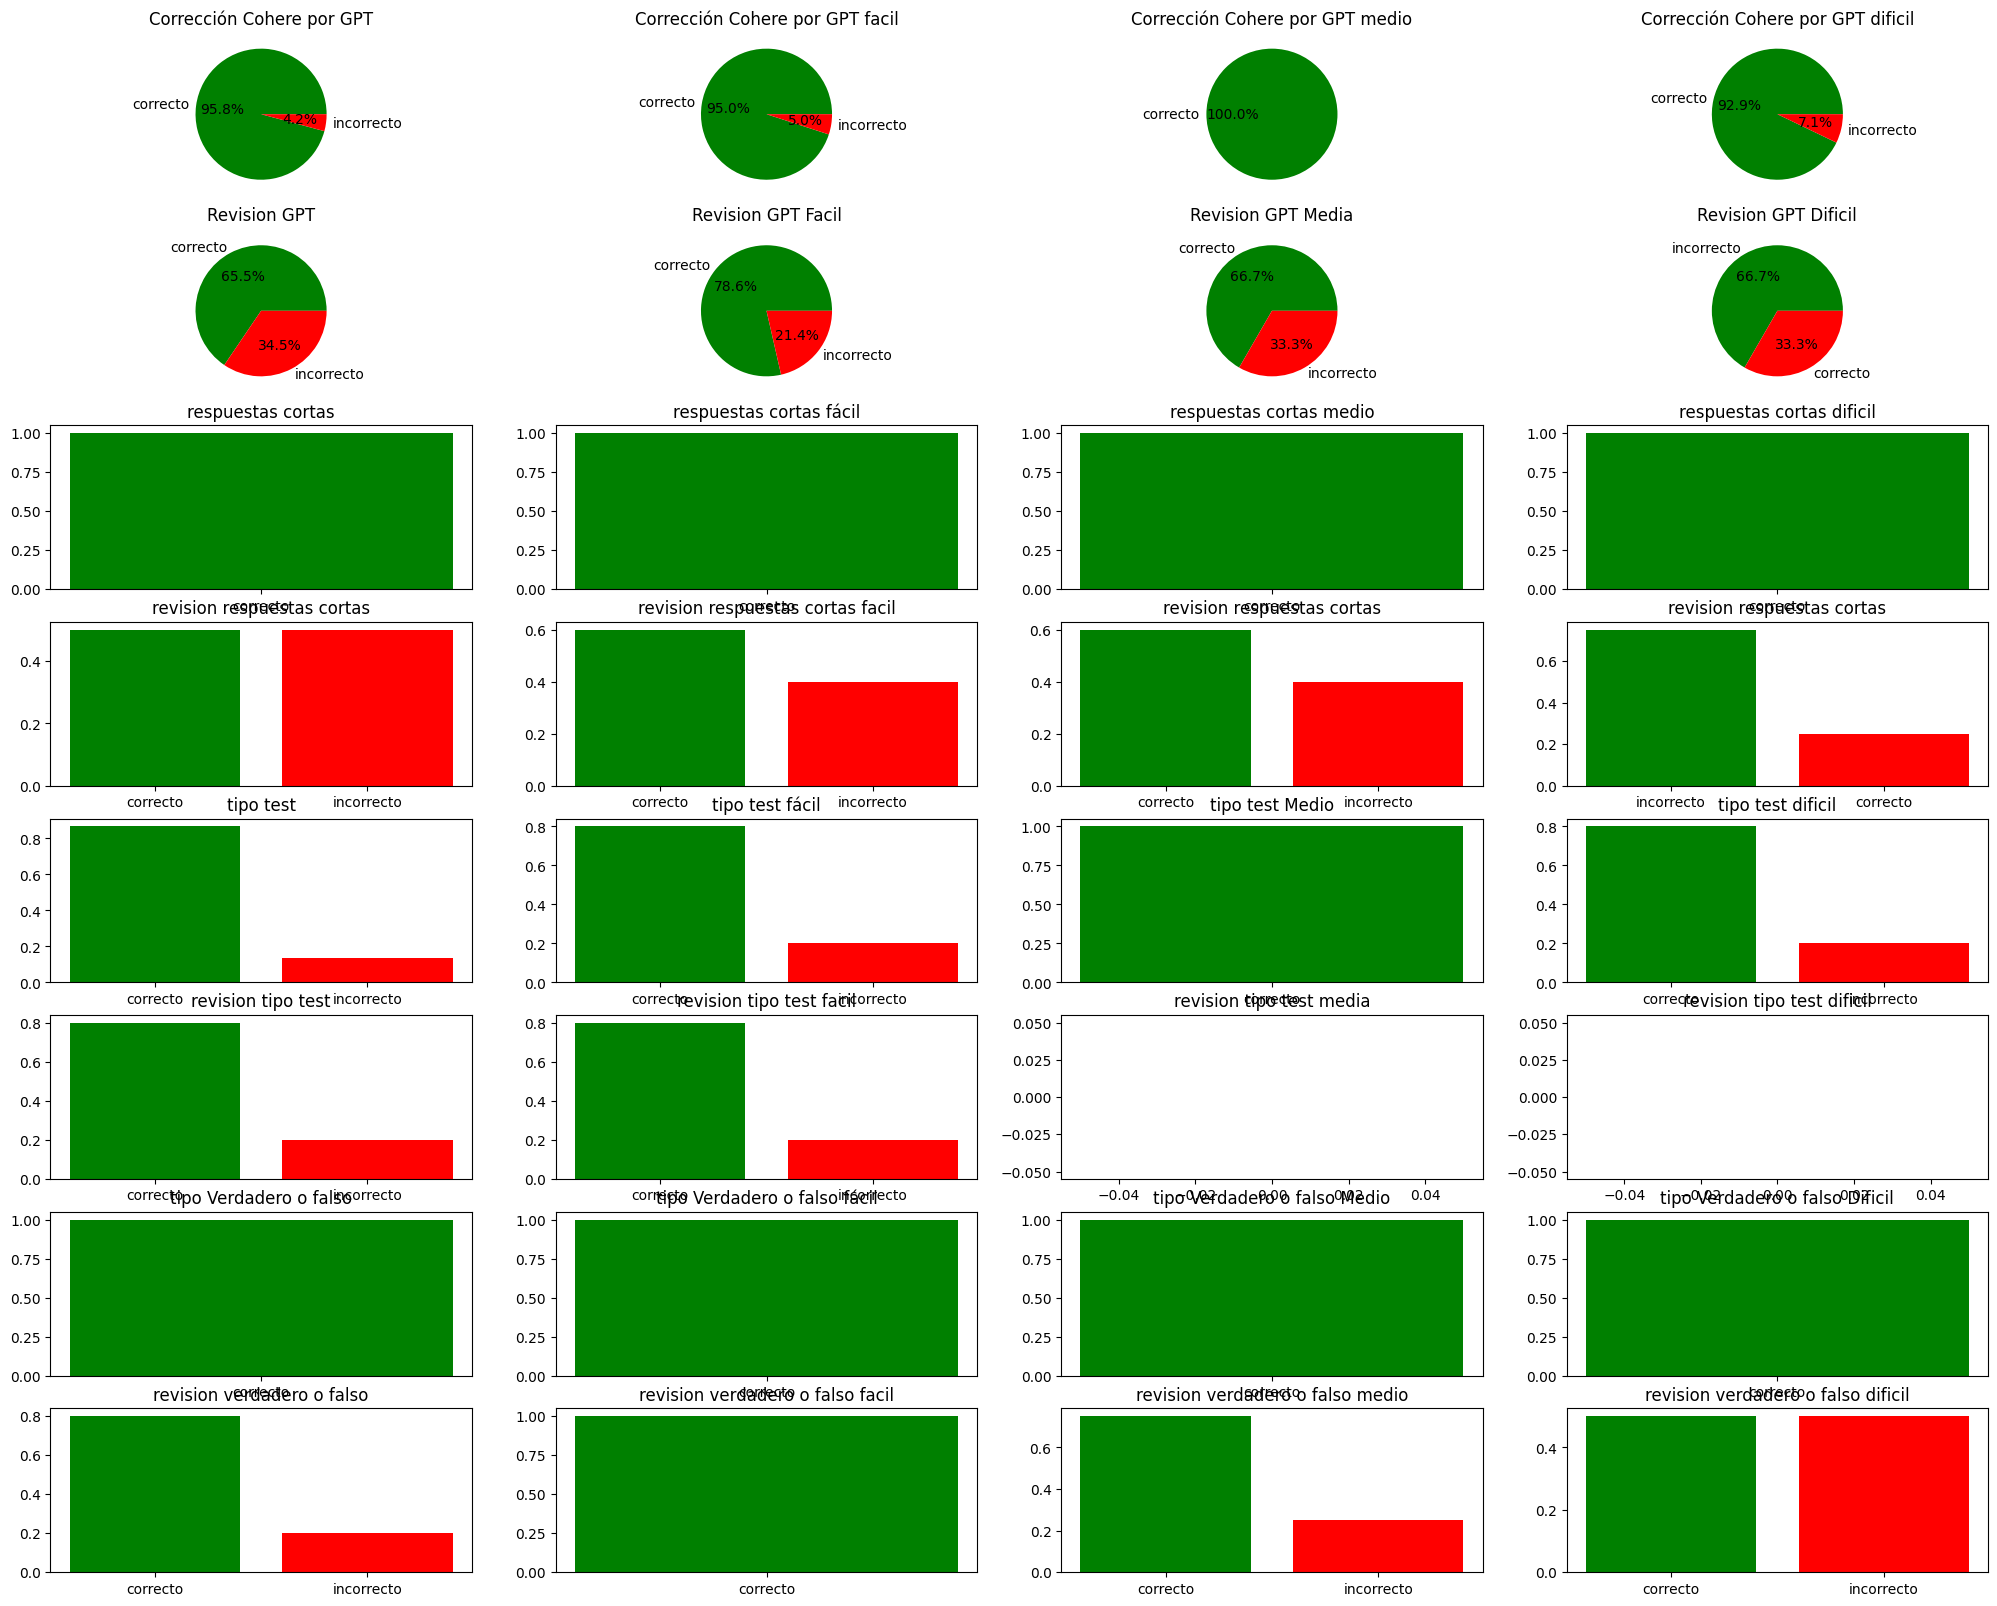

In [32]:
# Calcular la proporción de respuestas correctas e incorrectas
general = resultados.loc[(resultados['tema'] == 'codigo')]
generalFacil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['dificultad'] == 'fácil')]
generalMedia = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['dificultad'] == 'media')]
generalDificil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['dificultad'] == 'difícil')]

generalRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo')]
generalFacilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['dificultad'] == 'fácil')]
generalMediaRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['dificultad'] == 'media')]
generalDificilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['dificultad'] == 'difícil')]


corta = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'respuesta corta')]
cortaFacil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'respuesta corta') & (resultados['dificultad'] == 'fácil')]
cortaMedia = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'respuesta corta')& (resultados['dificultad'] == 'media')]
cortaDificil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'respuesta corta')& (resultados['dificultad'] == 'difícil')]

cortaRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'respuesta corta')]
cortaFacilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'respuesta corta') & (revisiones['dificultad'] == 'fácil')]
cortaMediaRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'respuesta corta')& (revisiones['dificultad'] == 'media')]
cortaDificilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'respuesta corta')& (revisiones['dificultad'] == 'difícil')]

tetsRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'test con 3 opciones')]
tetsFacilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'test con 3 opciones')& (revisiones['dificultad'] == 'fácil')]
tetsMediaRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'test con 3 opciones')& (revisiones['dificultad'] == 'media')]
tetsDificilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'test con 3 opciones')& (revisiones['dificultad'] == 'difícil')]

tets = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'test con 3 opciones')]
tetsFacil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'fácil')]
tetsMedia = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'media')]
tetsDificil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'test con 3 opciones')& (resultados['dificultad'] == 'difícil')]

vof = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'verdadero o falso')]
vofFacil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'fácil')]
vofMedia = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'media')]
vofDificil = resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'verdadero o falso')& (resultados['dificultad'] == 'difícil')]

vofRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'verdadero o falso')]
vofFacilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'verdadero o falso')& (revisiones['dificultad'] == 'fácil')]
vofMediaRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'verdadero o falso')& (revisiones['dificultad'] == 'media')]
vofDificilRevisiones = revisiones.loc[(revisiones['tema'] == 'codigo') & (revisiones['tipo'] == 'verdadero o falso')& (revisiones['dificultad'] == 'difícil')]

proporcionesCohere = general['resultado'].value_counts(normalize=True)
proporcionesCohereFacil = generalFacil['resultado'].value_counts(normalize=True)
proporcionesCohereMedia = generalMedia['resultado'].value_counts(normalize=True)
proporcionesCohereDificil = generalDificil['resultado'].value_counts(normalize=True)

proporcionesGPT = generalRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTFacil = generalFacilRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTMedia = generalMediaRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTDificil = generalDificilRevisiones['revision'].value_counts(normalize=True)

proporcionesCohereCorta = corta['resultado'].value_counts(normalize=True)
proporcionesCohereTest = tets['resultado'].value_counts(normalize=True)
proporcionesCohereVof = vof['resultado'].value_counts(normalize=True)

proporcionesGPTCorta = cortaRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTTest = tetsRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTVof = vofRevisiones['revision'].value_counts(normalize=True)


proporcionesCohereCortaFacil = cortaFacil['resultado'].value_counts(normalize=True)
proporcionesCohereTestFacil = tetsFacil['resultado'].value_counts(normalize=True)
proporcionesCohereVofFacil = vofFacil['resultado'].value_counts(normalize=True)

proporcionesGPTCortaFacil = cortaFacilRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTTestFacil = tetsFacilRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTVofFacil = vofFacilRevisiones['revision'].value_counts(normalize=True)

proporcionesCohereCortaMedia = cortaMedia['resultado'].value_counts(normalize=True)
proporcionesCohereTestMedia = tetsMedia['resultado'].value_counts(normalize=True)
proporcionesCohereVofMedia = vofMedia['resultado'].value_counts(normalize=True)

proporcionesGPTCortaMedia = cortaMediaRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTTestMedia = tetsMediaRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTVofMedia = vofMediaRevisiones['revision'].value_counts(normalize=True)

proporcionesCohereCortaDificil = cortaDificil['resultado'].value_counts(normalize=True)
proporcionesCohereTestDificil = tetsDificil['resultado'].value_counts(normalize=True)
proporcionesCohereVofDificil = vofDificil['resultado'].value_counts(normalize=True)

proporcionesGPTCortaDificil = cortaDificilRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTTestDificil = tetsDificilRevisiones['revision'].value_counts(normalize=True)
proporcionesGPTVofDificil = vofDificilRevisiones['revision'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(8, 4, figsize=(20, 25))

# Crear el gráfico circular en el segundo subplot
axs[0][0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][0].set_title('Corrección Cohere por GPT')

axs[0][1].pie(proporcionesCohereFacil.values, labels=proporcionesCohereFacil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][1].set_title('Corrección Cohere por GPT facil')

axs[0][2].pie(proporcionesCohereMedia.values, labels=proporcionesCohereMedia.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][2].set_title('Corrección Cohere por GPT medio')

axs[0][3].pie(proporcionesCohereDificil.values, labels=proporcionesCohereDificil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][3].set_title('Corrección Cohere por GPT dificil')

#revision gpt general
axs[1][0].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1][0].set_title('Revision GPT')

axs[1][1].pie(proporcionesGPTFacil.values, labels=proporcionesGPTFacil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1][1].set_title('Revision GPT Facil')

axs[1][2].pie(proporcionesGPTMedia.values, labels=proporcionesGPTMedia.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1][2].set_title('Revision GPT Media')

axs[1][3].pie(proporcionesGPTDificil.values, labels=proporcionesGPTDificil.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1][3].set_title('Revision GPT Dificil')

axs[2][0].bar(proporcionesCohereCorta.index, proporcionesCohereCorta.values, color=['green', 'red'])
axs[2][0].set_title('respuestas cortas')

axs[2][1].bar(proporcionesCohereCortaFacil.index, proporcionesCohereCortaFacil.values, color=['green', 'red'])
axs[2][1].set_title('respuestas cortas fácil')

axs[2][2].bar(proporcionesCohereCortaMedia.index, proporcionesCohereCortaMedia.values, color=['green', 'red'])
axs[2][2].set_title('respuestas cortas medio')

axs[2][3].bar(proporcionesCohereCortaDificil.index, proporcionesCohereCortaDificil.values, color=['green', 'red'])
axs[2][3].set_title('respuestas cortas dificil')

axs[3][0].bar(proporcionesGPTCorta.index, proporcionesGPTCorta.values, color=['green', 'red'])
axs[3][0].set_title('revision respuestas cortas')

axs[3][1].bar(proporcionesGPTCortaFacil.index, proporcionesGPTCortaFacil.values, color=['green', 'red'])
axs[3][1].set_title('revision respuestas cortas facil')

axs[3][2].bar(proporcionesGPTCortaMedia.index, proporcionesGPTCortaMedia.values, color=['green', 'red'])
axs[3][2].set_title('revision respuestas cortas')

axs[3][3].bar(proporcionesGPTCortaDificil.index, proporcionesGPTCortaDificil.values, color=['green', 'red'])
axs[3][3].set_title('revision respuestas cortas')

axs[4][0].bar(proporcionesCohereTest.index, proporcionesCohereTest.values, color=['green', 'red'])
axs[4][0].set_title('tipo test')

axs[4][1].bar(proporcionesCohereTestFacil.index, proporcionesCohereTestFacil.values, color=['green', 'red'])
axs[4][1].set_title('tipo test fácil')

axs[4][2].bar(proporcionesCohereTestMedia.index, proporcionesCohereTestMedia.values, color=['green', 'red'])
axs[4][2].set_title('tipo test Medio')

axs[4][3].bar(proporcionesCohereTestDificil.index, proporcionesCohereTestDificil.values, color=['green', 'red'])
axs[4][3].set_title('tipo test dificil')

axs[5][0].bar(proporcionesGPTTest.index, proporcionesGPTTest.values, color=['green', 'red'])
axs[5][0].set_title('revision tipo test')

axs[5][1].bar(proporcionesGPTTestFacil.index, proporcionesGPTTestFacil.values, color=['green', 'red'])
axs[5][1].set_title('revision tipo test facil')

axs[5][2].bar(proporcionesGPTTestMedia.index, proporcionesGPTTestMedia.values, color=['green', 'red'])
axs[5][2].set_title('revision tipo test media')

axs[5][3].bar(proporcionesGPTTestDificil.index, proporcionesGPTTestDificil.values, color=['green', 'red'])
axs[5][3].set_title('revision tipo test dificil')

axs[6][0].bar(proporcionesCohereVof.index, proporcionesCohereVof.values, color=['green', 'red'])
axs[6][0].set_title('tipo Verdadero o falso')

axs[6][1].bar(proporcionesCohereVofFacil.index, proporcionesCohereVofFacil.values, color=['green', 'red'])
axs[6][1].set_title('tipo Verdadero o falso fácil')

axs[6][2].bar(proporcionesCohereVofMedia.index, proporcionesCohereVofMedia.values, color=['green', 'red'])
axs[6][2].set_title('tipo Verdadero o falso Medio')

axs[6][3].bar(proporcionesCohereVofDificil.index, proporcionesCohereVofDificil.values, color=['green', 'red'])
axs[6][3].set_title('tipo Verdadero o falso Dificil')

axs[7][0].bar(proporcionesGPTVof.index, proporcionesGPTVof.values, color=['green', 'red'])
axs[7][0].set_title('revision verdadero o falso')

axs[7][1].bar(proporcionesGPTVofFacil.index, proporcionesGPTVofFacil.values, color=['green', 'red'])
axs[7][1].set_title('revision verdadero o falso facil')

axs[7][2].bar(proporcionesGPTVofMedia.index, proporcionesGPTVofMedia.values, color=['green', 'red'])
axs[7][2].set_title('revision verdadero o falso medio')

axs[7][3].bar(proporcionesGPTVofDificil.index, proporcionesGPTVofDificil.values, color=['green', 'red'])
axs[7][3].set_title('revision verdadero o falso dificil')

plt.show()

In [31]:
revisiones

,pregunta,tipo,tema,dificultad,respuesta,resultado,revision
0,¿Cuál es el país más grande del mundo en térmi...,respuesta corta,cultura general,fácil,"Russia is the largest country by far, with a ...",correcto,correcto
1,"¿Quién escribió la famosa novela ""Cien años de...",respuesta corta,cultura general,media,Gabriel García Márquez,correcto,correcto
2,¿En qué año se fundó la Universidad de Bolonia...,respuesta corta,cultura general,difícil,La Universidad de Bolonia se fundó en 1088 y ...,correcto,correcto
3,"¿Quién escribió la famosa novela ""Don Quijote ...",respuesta corta,cultura general,fácil,Miguel de Cervantes Saavedra es el autor de l...,correcto,correcto
4,¿En qué año se llevó a cabo la independencia d...,respuesta corta,cultura general,fácil,La Independencia de México se realizó el 16 d...,correcto,correcto
...,...,...,...,...,...,...,...
384,```java\npublic class Main {\n public stati...,test con 3 opciones,codigo,fácil,A) Calcula el factorial de un número y lo imp...,correcto,correcto
385,```java\npublic class Main {\n public stati...,test con 3 opciones,codigo,fácil,A) 15\n\nLa presión de llamada de la funciona...,correcto,incorrecto
386,¿Qué hace el siguiente código en Python?\n\n``...,test con 3 opciones,codigo,fácil,A) Calcula el producto de todos los elementos...,correcto,correcto
387,¿Qué realiza el siguiente código en Java?\n\n`...,test con 3 opciones,codigo,fácil,A) Imprime los números pares hasta el número 5,incorrecto,correcto
